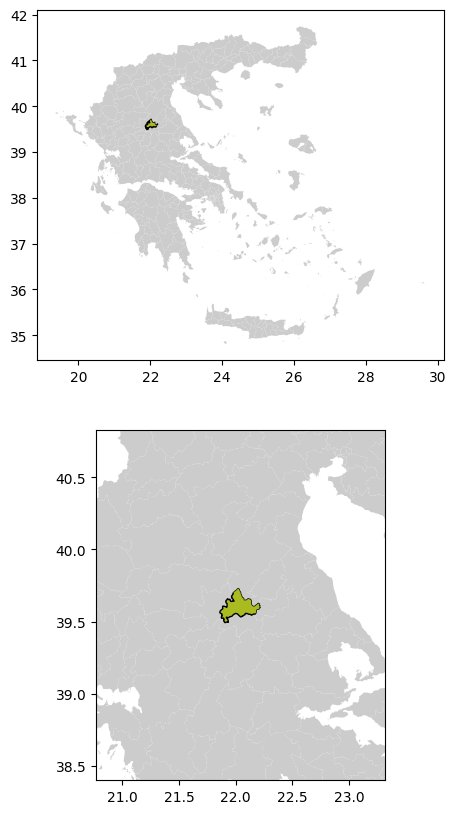

Type 'stop' to end
What is the name of this municipality?  stop


the answer was Farkadona


In [91]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import random

greekMunis = gpd.read_file("greekMunicipalities.geojson")

guess = ""
goodIndices = []

for i in range (len(greekMunis)-1):
    if pd.notna(greekMunis.loc[greekMunis.index[i], 'name_en']):
        goodIndices.append(i)
random.shuffle(goodIndices)

while guess != "stop" and goodIndices != []:
    featureid = goodIndices.pop(0)
    greekMunis[['color','edgecolor']] = ['#cccccc',"none"]
    greekMunis.loc[greekMunis.index[featureid], ['color','edgecolor']] = ['#aabb22','#000000']
    #print(greekMunis)

    minx, miny, maxx, maxy = greekMunis.loc[greekMunis.index[featureid], 'geometry'].bounds
    pad = 3*(maxx-minx)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    greekMunis.plot(ax=ax1, color=greekMunis['color'].tolist(), edgecolor=greekMunis['edgecolor'].tolist(), linewidth=1)
    greekMunis.plot(ax=ax2, color=greekMunis['color'].tolist(), edgecolor=greekMunis['edgecolor'].tolist(), linewidth=1)
    ax2.set_xlim(minx - pad, maxx + pad)
    ax2.set_ylim(miny - pad, maxy + pad)
    plt.show()
    
    guess = input("Type 'stop' to end\nWhat is the name of this municipality? ")
    answer = greekMunis.loc[greekMunis.index[featureid], 'name_en']
    if guess.strip().lower() == answer.strip().lower():
        print("yeh")
    elif guess == "stop":
        print(f"the answer was {answer}")
    else:
        print(f"nyeh, the answer was {answer}")